In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster');
%matplotlib inline

In [46]:
sr = 100
ts = 1.0/sr
pi = np.pi
t = np.arange(0, 125,ts) # time
trialTime = 200 # 2 seconds
baselineTime = 50 # 0.5 seconds

In [47]:
# genrate 2 signals
channel_1 = np.sin(t) + np.random.normal(scale=1, size=len(t))
channel_2 = np.sin(t) + np.random.normal(scale=1, size=len(t))

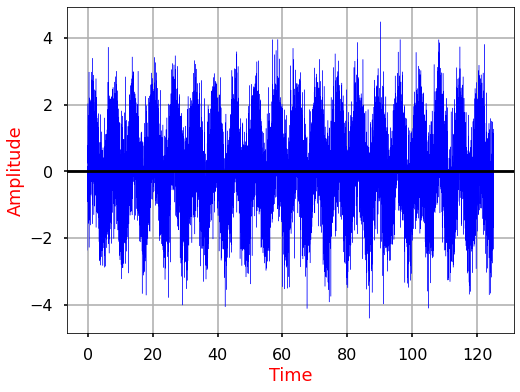

In [48]:
# draw first signal
plt.figure(figsize = (8, 6))
plt.plot(t, channel_1, 'blue', lw=0.4)
plt.ylabel('Amplitude', color='r')
plt.xlabel('Time', color='r')
plt.grid()
plt.axhline(0, c="black")
plt.show();

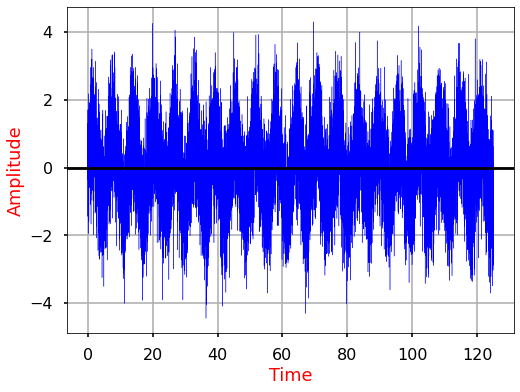

In [49]:
# draw first signal
plt.figure(figsize = (8, 6))
plt.plot(t, channel_2, 'blue', lw=0.4)
plt.ylabel('Amplitude' ,color='r')
plt.xlabel('Time', color='r')
plt.grid()
plt.axhline(0, c="black")
plt.show();

In [50]:
# function to get trials of a signal
def get_triales(signal,time=200,baselineTime = 50):
    trials = []
    for t in range(0,len(signal),time+baselineTime):
        trial = signal[t:t+time+baselineTime]
        trials.append(trial)
    trials = np.array(trials)
    return trials

In [51]:
trials_1 = get_triales(signal=channel_1,time=trialTime,baselineTime=baselineTime)
trials_2 = get_triales(signal=channel_2,time=trialTime,baselineTime=baselineTime)

In [52]:
trials_1.shape

(50, 250)

In [53]:
# function to get the ERP of a trials
def ERP(trials,baselineTime = 50):
    meaned_trial = np.mean(trials,axis=0)
    baseline = meaned_trial[0:baselineTime]
    meaned_baseline = np.mean(baseline)
    print(meaned_baseline)
    Diff = meaned_trial - meaned_baseline

    return Diff

In [54]:
Diff_1 = ERP(trials_1,baselineTime)
Diff_2 = ERP(trials_2,baselineTime)

-0.014290945221254488
0.005259390792798887


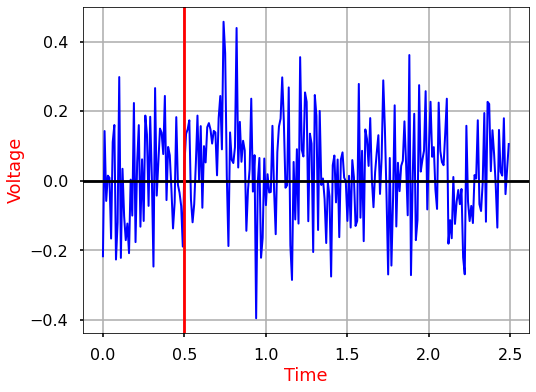

In [55]:
plt.figure(figsize = (8, 6))
plt.plot(t[0:250], Diff_1, 'blue', lw=2)
plt.ylabel('Voltage' ,color='r')
plt.xlabel('Time', color='r')
plt.grid()
plt.axhline(0, c="black")
plt.axvline(0.5, c="r",ls = "-")
plt.show();

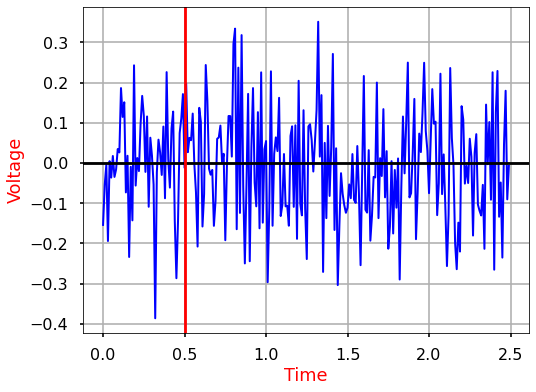

In [56]:
plt.figure(figsize = (8, 6))
plt.plot(t[0:250], Diff_2, 'blue', lw=2)
plt.ylabel('Voltage', color='r')
plt.xlabel('Time', color='r')
plt.grid()
plt.axhline(0, c="black")
plt.axvline(0.5, c="r",ls = "-")
plt.show();

In [57]:
from scipy.io import loadmat       # Import function to read data.
from pylab import *                # Import numerical and plotting functions

In [58]:
Diff = get_triales(signal=channel_1,time=trialTime,baselineTime=baselineTime)                         # ... and get the EEG from one condition,
ntrials = len(Diff)                             # ... and compute the number of trials.
ntrials

50

250


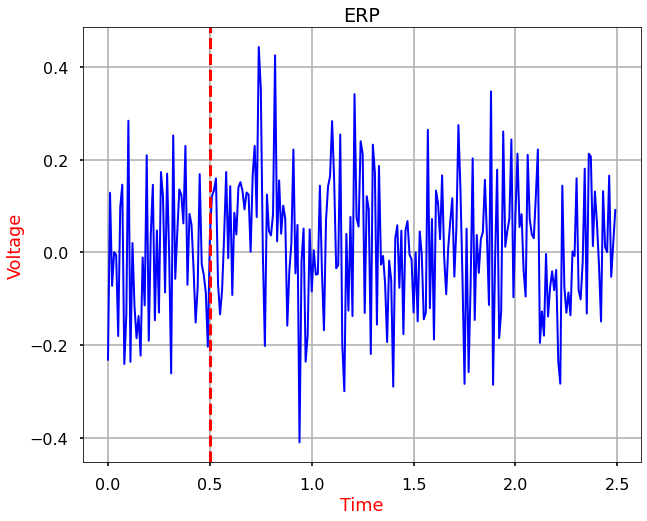

In [59]:
m = Diff.mean(axis=0)                               # Compute the mean signal across trials (the ERP).
sd = Diff.std(axis=0)                                # Compute the std of the signal across trials.
sdmn = sd / np.sqrt(ntrials)                       # Compute the std of the mean.
print(len(m))
plt.figure(figsize = (10, 8))
plot(t[0:250], m, 'blue', lw=2)                          # Plot the ERP of condition A,
xlabel('Time', color='r')                              # Label the axes,
ylabel('Voltage', color='r')
title('ERP')                     # ... provide a useful title,
plt.axvline(0.5, c="red",ls = "--", lw=3)
plt.grid()
show()  